In [1]:
import shlex 
import subprocess
import matplotlib as mpl 
import matplotlib.pyplot as plt 


In [3]:
# Matplotlib configuration
mpl.rcParams.update(mpl.rcParamsDefault)
# mpl.rc_file('../../matplotlibrc', use_default_template=False)

In [4]:
# Lets have a look into the PDB file
with open("3p5g.pdb") as pdb_file:
    show = 10  # Lines to show
    for lc, line in enumerate(pdb_file):
        # Print the first lines of the file
        if lc < show:
            print(line.strip())
print("=" * 80)
print("Total line count: ", lc)

HEADER    SUGAR BINDING PROTEIN                   08-OCT-10   3P5G
TITLE     STRUCTURE OF THE CARBOHYDRATE-RECOGNITION DOMAIN OF HUMAN LANGERIN
TITLE    2 WITH BLOOD GROUP B TRISACCHARIDE (GAL ALPHA1-3(FUC ALPHA1-2)GAL)
COMPND    MOL_ID: 1;
COMPND   2 MOLECULE: C-TYPE LECTIN DOMAIN FAMILY 4 MEMBER K;
COMPND   3 CHAIN: A, B, C, D;
COMPND   4 FRAGMENT: LANGERIN CRD (UNP RESIDUES 193-328);
COMPND   5 SYNONYM: LANGERIN;
COMPND   6 ENGINEERED: YES
SOURCE    MOL_ID: 1;
Total line count:  5852


In [5]:
# What is the protein sequence?
with open("3p5g.pdb") as pdb_file:
    for line in pdb_file:
        if line.startswith("SEQRES"):
            line = line.split()
            if line[2] == "A":
                # Only print sequence for chain A
                print(*line[4:])

GLN VAL VAL SER GLN GLY TRP LYS TYR PHE LYS GLY ASN
PHE TYR TYR PHE SER LEU ILE PRO LYS THR TRP TYR SER
ALA GLU GLN PHE CYS VAL SER ARG ASN SER HIS LEU THR
SER VAL THR SER GLU SER GLU GLN GLU PHE LEU TYR LYS
THR ALA GLY GLY LEU ILE TYR TRP ILE GLY LEU THR LYS
ALA GLY MET GLU GLY ASP TRP SER TRP VAL ASP ASP THR
PRO PHE ASN LYS VAL GLN SER ALA ARG PHE TRP ILE PRO
GLY GLU PRO ASN ASN ALA GLY ASN ASN GLU HIS CYS GLY
ASN ILE LYS ALA PRO SER LEU GLN ALA TRP ASN ASP ALA
PRO CYS ASP LYS THR PHE LEU PHE ILE CYS LYS ARG PRO
TYR VAL PRO SER GLU PRO


In [6]:
# What else is in the file?
with open("3p5g.pdb") as pdb_file:
    for line in pdb_file:
        if line.startswith(("HETNAM", "FORMUL")):
            print(line.strip())

HETNAM     GAL BETA-D-GALACTOPYRANOSE
HETNAM     FUC ALPHA-L-FUCOPYRANOSE
HETNAM     GLA ALPHA-D-GALACTOPYRANOSE
HETNAM      CA CALCIUM ION
FORMUL   5  GAL    C6 H12 O6
FORMUL   5  FUC    4(C6 H12 O5)
FORMUL   5  GLA    3(C6 H12 O6)
FORMUL   7   CA    4(CA 2+)
FORMUL  13  HOH   *816(H2 O)


In [7]:
with open("3p5g.pdb") as pdb_file:
    show = 10
    count = 0
    # Print the first ATOM entries
    for line in pdb_file:
        if count >= show:
            break
        if line.startswith(("ATOM")):
            print(line.strip())
            count += 1

ATOM      1  N   GLY A 198       1.923  33.617   6.889  1.00 29.44           N
ATOM      2  CA  GLY A 198       2.927  34.067   5.942  1.00 33.42           C
ATOM      3  C   GLY A 198       4.064  33.079   5.747  1.00 21.30           C
ATOM      4  O   GLY A 198       5.016  33.355   5.022  1.00 26.76           O
ATOM      5  N   TRP A 199       3.964  31.919   6.391  1.00 19.08           N
ATOM      6  CA  TRP A 199       4.990  30.892   6.261  1.00 19.93           C
ATOM      7  C   TRP A 199       4.987  30.356   4.840  1.00 28.23           C
ATOM      8  O   TRP A 199       3.926  30.117   4.255  1.00 30.68           O
ATOM      9  CB  TRP A 199       4.772  29.756   7.263  1.00 22.11           C
ATOM     10  CG  TRP A 199       4.961  30.161   8.697  1.00 19.73           C


In [8]:
with open("3p5g.pdb") as pdb_file:
    show = 34
    count = 0
    # Print the first HETATM entries
    for line in pdb_file:
        if count >= show:
            break
        if line.startswith(("HETATM")):
            print(line.strip())
            count += 1

HETATM 4215  C1  GAL E   1      35.691  44.693   5.881  1.00 58.00           C
HETATM 4216  C2  GAL E   1      34.721  44.101   4.866  1.00 34.37           C
HETATM 4217  C3  GAL E   1      35.517  43.473   3.723  1.00 26.42           C
HETATM 4218  C4  GAL E   1      36.531  44.479   3.176  1.00 47.76           C
HETATM 4219  C5  GAL E   1      37.356  45.105   4.295  1.00 46.54           C
HETATM 4220  C6  GAL E   1      38.282  46.188   3.748  1.00 66.04           C
HETATM 4221  O1  GAL E   1      34.968  45.256   6.951  1.00 41.39           O
HETATM 4222  O2  GAL E   1      33.927  43.149   5.553  1.00 30.54           O
HETATM 4223  O3  GAL E   1      34.648  43.055   2.689  1.00 32.94           O
HETATM 4224  O4  GAL E   1      35.864  45.510   2.481  1.00 33.15           O
HETATM 4225  O5  GAL E   1      36.495  45.674   5.258  1.00 38.71           O
HETATM 4226  O6  GAL E   1      38.986  46.792   4.811  1.00 54.30           O
HETATM 4227  C1  FUC E   2      32.629  42.960   4.9

In [9]:
# Lauch VMD from Jupyter
view = subprocess.Popen(
    shlex.split("vmd 3p5g.pdb"),
    close_fds=True,
    stdin=subprocess.PIPE,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

In [10]:
# Check structure for alternative atom positions
with open("3p5g.pdb") as pdb_file:
    for line in pdb_file:
        if not line.startswith("ATOM"):
            continue
        if not line[21] == "A":  # Chain A?
            continue
        if line[16] != " ":      # Alternativ atoms positions?
            print(line.strip())

ATOM    658  CA ASER A 277      29.047  24.388   2.751  0.50 19.39           C
ATOM    659  CA BSER A 277      29.040  24.387   2.738  0.50 18.11           C
ATOM    662  CB ASER A 277      28.811  24.669   4.239  0.50 18.59           C
ATOM    663  CB BSER A 277      28.762  24.666   4.218  0.50 17.85           C
ATOM    664  OG ASER A 277      27.712  23.928   4.738  0.50 15.78           O
ATOM    665  OG BSER A 277      29.938  24.530   4.996  0.50 17.39           O


In [12]:
allowed_res_ids = list(range(198, 326)) + [500]
# Protein 198 to 325 and Ca

# Copy desired information from one file to another
with open("3p5g.pdb") as in_file:
    with open("chain_A.pdb", "w") as out_file:
        for line in in_file:
            if line.startswith(("ATOM", "TER", "HETATM")):
                # check for atomic entries
                if not line[21] == "A":
                    # Chain A?
                    continue
                if not int(line[22:26]) in allowed_res_ids:
                    # Keep residue?
                    continue
                if line[16] == "B":  # Alternative set of atoms?
                    # Throw away location B
                    continue
                if line[16] == "A":  # Alternative set of atoms?
                    # Keep location A
                    line = line[:16] + " " + line[17:]
            out_file.write(line)

In [13]:
import pdbfixer
import simtk.openmm.app as app  # OpenMM interface

In [14]:
fixer = pdbfixer.PDBFixer("chain_A.pdb")  # Load file
fixer.findMissingResidues()               # Identify missing residues
fixer.findMissingAtoms()                  # Identify missing atoms
print(fixer.missingResidues)

{(0, 0): ['GLN', 'VAL', 'VAL', 'SER', 'GLN'], (0, 128): ['SER', 'GLU', 'PRO']}


In [15]:
fixer.addMissingAtoms()  # Apply the fix
app.PDBFile.writeFile(fixer.topology, fixer.positions, open('chain_A_fixed.pdb', 'w'))
# Save to file

In [17]:
offset = 192 # Residue numbering should start here

# Fix residue numbering
with open('chain_A_fixed.pdb') as in_file:
    with open('chain_A_fixednumbering.pdb', "w") as out_file:
        for line in in_file:
            if line.startswith(("ATOM", "TER", "HETATM")) and line[21] == "A":
                resid = int(line[22:26]) + offset
                line = line[:22] + f"{resid:>4}" + line[26:]
            out_file.write(line)

In [18]:
import simtk.openmm as mm       # Main OpenMM functionality
import simtk.openmm.app as app  # Application layer (handy interface)
import simtk.unit as unit       # Unit/quantaty handling

In [19]:
molecule = app.PDBFile("chain_A_fixednumbering.pdb")  # Load PDB
molecule.positions[0]  # Access position of atom 1

Quantity(value=Vec3(x=-1.5174, y=4.1002, z=0.401), unit=nanometer)

In [20]:
molecule.topology

<Topology; 2 chains, 137 residues, 1104 atoms, 1145 bonds>

In [21]:
forcefield = app.ForceField(
    "amber14/protein.ff14SB.xml",
    "amber14/tip3p.xml"
)

In [22]:
model = app.Modeller(molecule.topology, molecule.positions)
# Prepare molecule for modeling

model.addHydrogens(
    forcefield
    )

model.addSolvent(
    forcefield,
    padding=1*unit.nanometer,
    neutralize=True
    )

In [23]:
molecule.positions = model.getPositions()
molecule.topology = model.getTopology()

In [24]:
with open("solvated.pdb", "w") as file_:
    molecule.writeFile(
        molecule.topology, molecule.positions,
        file=file_
    )

In [25]:
# Create a simulation system from a force field
system = forcefield.createSystem(
    molecule.topology,                 # pass the molecular topology
    nonbondedMethod=app.PME,           # How to treat non-bonded interactions
    nonbondedCutoff=1*unit.nanometer,  # cutoff for non-bonded interactions
    constraints=app.HBonds             # Constrain H-heavy atom bonds
    )

In [26]:
system.addForce(
    mm.AndersenThermostat(300*unit.kelvin, 1/unit.picosecond)
    )

5

In [27]:
integrator = mm.VerletIntegrator(2.0*unit.femtoseconds)
integrator.setConstraintTolerance(0.00001)

In [28]:
simulation = app.Simulation(
    molecule.topology,                    # Topology
    system,                               # System
    integrator,                           # Integrator
    mm.Platform.getPlatformByName('CPU')  # Platform
)

In [29]:
simulation.context.setPositions(molecule.positions)

In [30]:
simulation.minimizeEnergy() ##################10 MINUTOS 

In [31]:
state = simulation.context.getState(getPositions=True)
molecule.positions = state.getPositions()

In [32]:
with open("min.pdb", "w") as file_:
    molecule.writeFile(
        molecule.topology, molecule.positions,
        file=file_
    )

In [33]:
molecule = app.PDBFile("min.pdb")
simulation.context.setPositions(molecule.positions)

In [34]:
run_length = 15  # 50000 * 2 fs = 100 ps
simulation.reporters.append(
    app.StateDataReporter(
        "equilibration.log", 500, step=True,
        potentialEnergy=True, totalEnergy=True,
        temperature=True, progress=True,
        remainingTime=True, speed=True,
        totalSteps=run_length,
        separator='\t')
        )

In [35]:
simulation.step(run_length)

In [36]:
pot_e = []
tot_e = []
temperature = []

with open("equilibration.log") as file_:
    for line in file_:
        if line.startswith("#"):
            continue
        for l, v in zip((pot_e, tot_e, temperature), line.split()[2:5]):
            l.append(float(v))

t = range(1, 101)

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

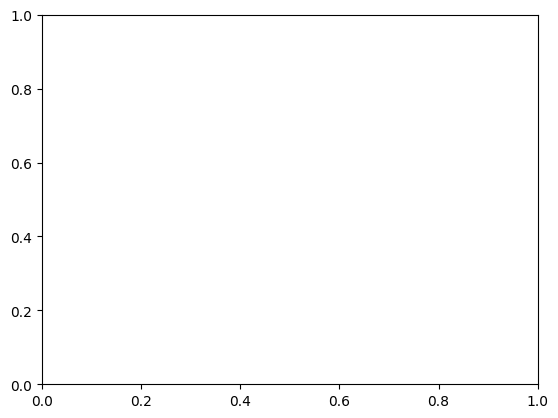

In [37]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot(t, [x / 1000 for x in pot_e], label="potential")
ax.plot(t, [x / 1000 for x in tot_e], label="total")

ax.set(**{
    "title": "Energy",
    "xlabel": "time / ps",
    "xlim": (0, 100),
    "ylabel": "energy / 10$^{3}$ kJ mol$^{-1}$"
    })

ax.legend(
    framealpha=1,
    edgecolor="k",
    fancybox=False
)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

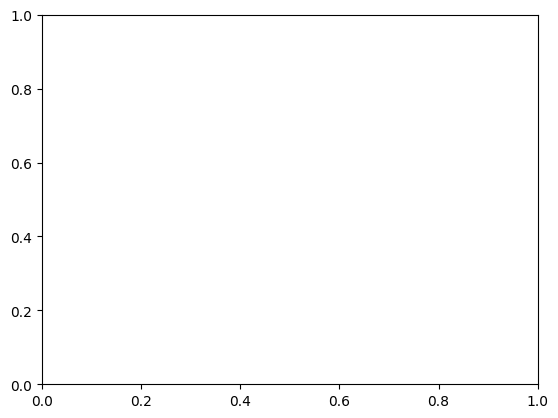

In [38]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot(t, temperature)

ax.set(**{
    "title": "Temperature",
    "xlabel": "time / ps",
    "xlim": (0, 100),
    "ylabel": "temperature / K"
    })
plt.show()

In [39]:
simulation.saveState("eq.xml")

In [40]:
simulation.loadState("eq.xml")